# Agriculture Commodities 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the Dataset
df = pd.read_csv("Agriculture_commodities_dataset.csv")
df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


# EDA and Preprocessing
Exploratory Data Analysis (EDA) helps you understand your data by summarizing its features, handling missing values, and identifying outliers. It uses visuals like charts and plots to reveal patterns and relationships. EDA prepares data for modeling by ensuring it's clean and meaningful.

In [3]:
df.shape

(62429, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   Year             62429 non-null  int64 
 3   Month            62429 non-null  object
 4   arrivals_in_qtl  62429 non-null  int64 
 5   min_price        62429 non-null  int64 
 6   max_price        62429 non-null  int64 
 7   modal_price      62429 non-null  int64 
 8   date             62429 non-null  object
 9   district_name    62429 non-null  object
 10  state_name       62429 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [5]:
df.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [6]:
# Ckeck null values
df.isnull().sum().sum()

0

Year


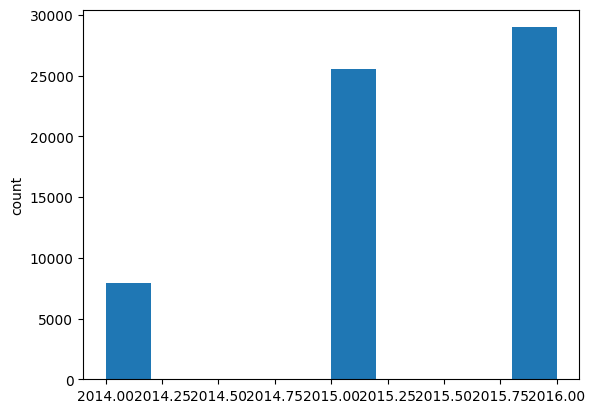

arrivals_in_qtl


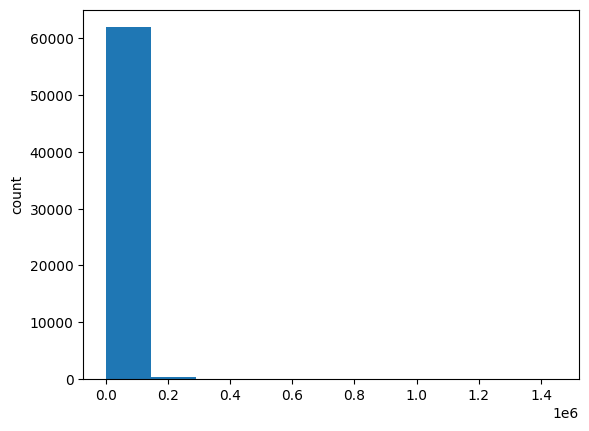

min_price


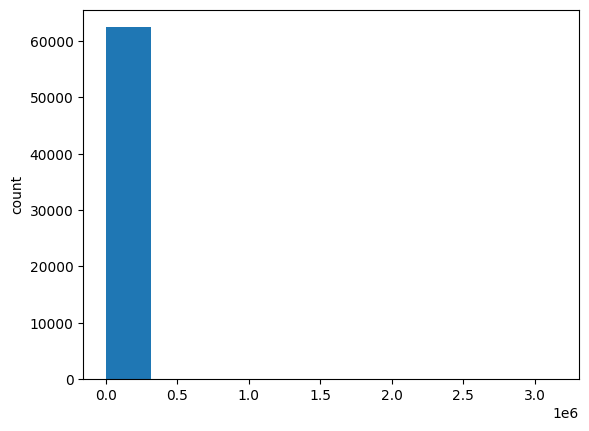

max_price


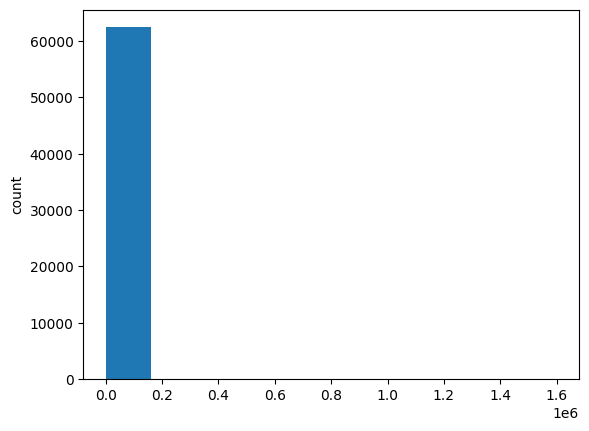

modal_price


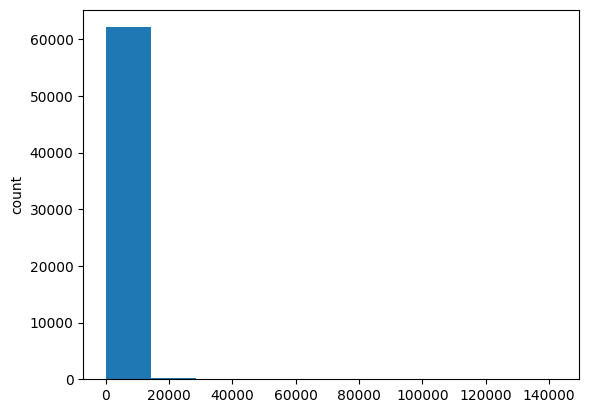

In [7]:
# Distribution Plot For Numerical Features

for i in df.select_dtypes(include = 'int64').columns:
    plt.hist(df[i])
    print(i)
    plt.ylabel('count')
    plt.show()

# IQR Analysis for Outliers
IQR Analysis is a robust method for detecting outliers by measuring data spread between the first (Q1) and third quartiles (Q3). By identifying values outside the range of Q1 - 1.5*IQR and Q3 + 1.5*IQR, it highlights extreme values that could skew analysis or impact model performance. This technique enhances data integrity by ensuring that only meaningful, non-extreme values contribute to the insights and predictions.


In [8]:
import matplotlib.pyplot as plt

Year


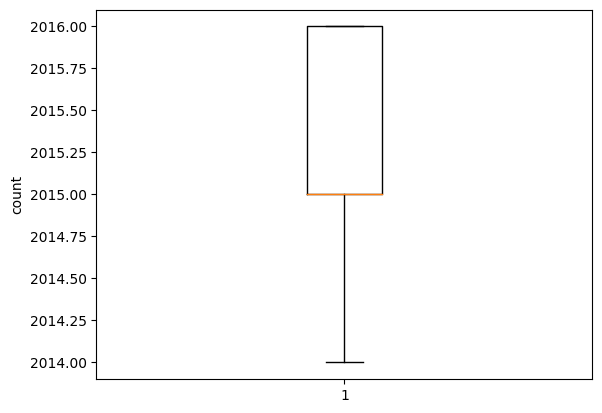

arrivals_in_qtl


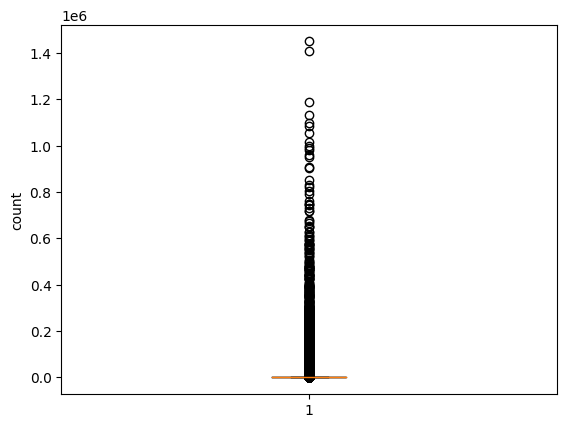

min_price


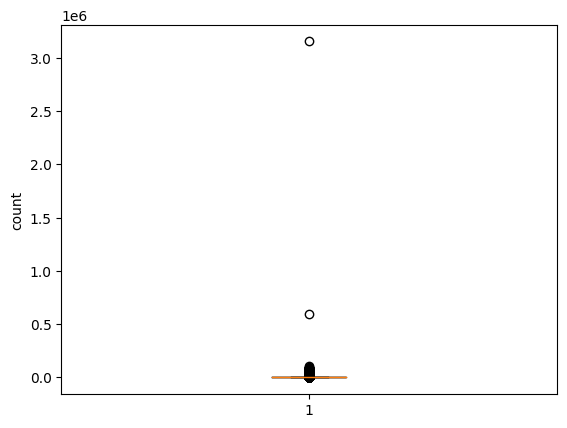

max_price


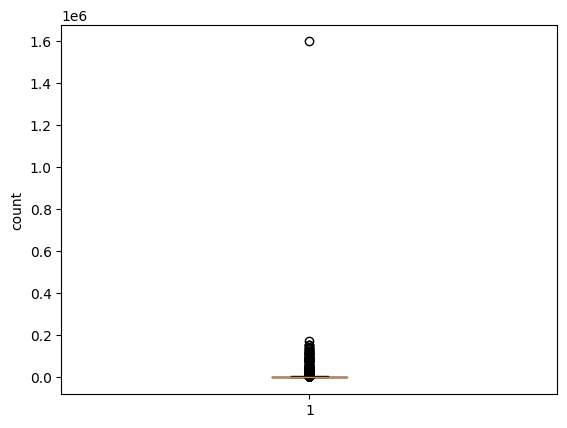

modal_price


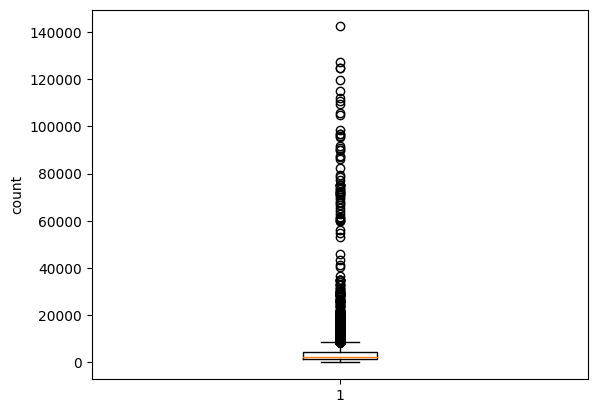

In [9]:
for i in df.select_dtypes(include='int64').columns:
 plt.boxplot(df[i])
 print(i)
 plt.ylabel('count')
 plt.show()

In [10]:
outlier_list=['arrivals_in_qtl','min_price','max_price']
for i in outlier_list:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1

    df = df[(df[i]>Q1 - Q1-1.5*IQR) & (df[i]< Q3+1.5*IQR)]

Year


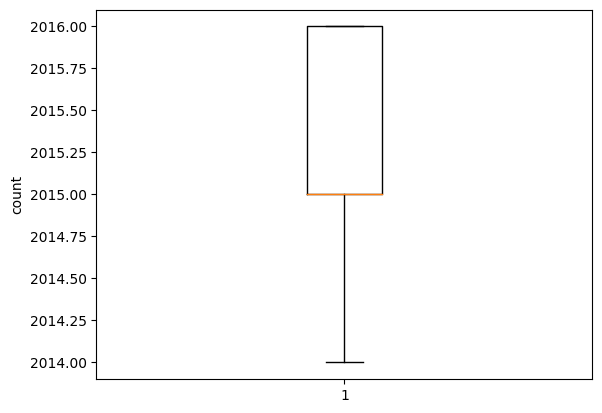

arrivals_in_qtl


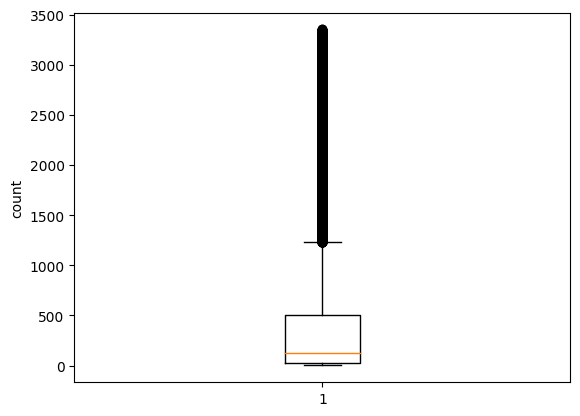

min_price


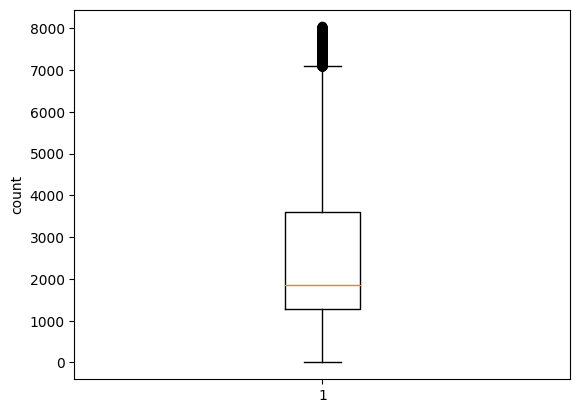

max_price


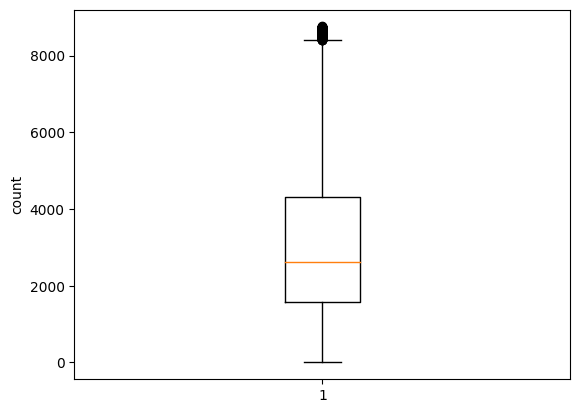

modal_price


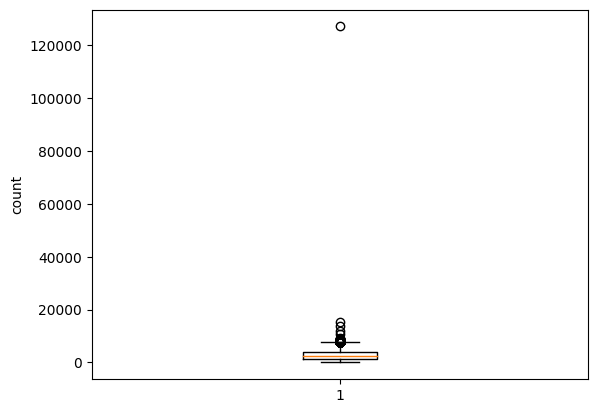

In [11]:
for i in df.select_dtypes(include='int64').columns:
 plt.boxplot(df[i])
 print(i)
 plt.ylabel('count')
 plt.show()

In [12]:
df.shape

(49534, 11)

In [13]:
# check duplicates
df.duplicated().sum()

0

# Multicollinearity & VIF
**Multicollinearity** refers to a situation in regression analysis where two or more independent variables are highly correlated, leading to unreliable coefficient estimates and inflated standard errors. This can make it difficult to determine the individual effect of each variable on the dependent variable. 

**Variance Inflation Factor (VIF)** is a quantifiable measure used to detect multicollinearity. A VIF value greater than 10 typically indicates problematic multicollinearity, suggesting that the independent variable is highly correlated with other variables in the model. Addressing multicollinearity through techniques like removing variables, combining them, or using regularization methods can improve model interpretability and predictive accuracy. Recognizing and managing multicollinearity is crucial for developing robust regression models.


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

col_list = []

for i in df.columns:
    if (df[i].dtype != 'object') & (i != 'modal_price'):
        col_list.append(i)

X = df[col_list]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Year,4.067420
1,arrivals_in_qtl,1.441265
2,min_price,20.908300
3,max_price,24.647212


8. Drop the features VIF value more than 6

In [15]:
df = df.drop('max_price', axis = 'columns')

In [16]:
# Features Selection for our model

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

col_list = []

for i in df.columns:
    if (df[i].dtype != 'object') & (i != 'modal_price'):
        col_list.append(i)

X = df[col_list]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Year,3.584787
1,arrivals_in_qtl,1.428929
2,min_price,2.967957


# Linear Regression
Linear Regression models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to predict outcomes and assess predictor influence.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
X = df[['Year','arrivals_in_qtl','min_price']]
X.head()

,Year,arrivals_in_qtl,min_price
0,2015,79,1406
1,2016,106,1788
2,2015,1253,1572
3,2016,387,1750
5,2016,2093,1695


In [19]:
y = df.modal_price
y.head()

0    1463
1    1875
2    1731
3    1999
5    2119
Name: modal_price, dtype: int64

Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 999)

In [21]:
X_train

,Year,arrivals_in_qtl,min_price
18921,2016,5,6128
40352,2016,3298,1844
24112,2015,532,1954
20194,2015,385,637
2708,2016,924,1519
...,...,...,...
6937,2016,37,1567
20633,2016,3,5100
57536,2016,1282,5842
15206,2016,1082,700


In [22]:
y_train

18921    6550
40352    2061
24112    4696
20194     800
2708     1914
         ... 
6937     2067
20633    5100
57536    6170
15206    1300
38754     733
Name: modal_price, Length: 39627, dtype: int64

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Model Accuracy
model.score(X_test,y_test)

0.9458855126213402

In [26]:
# Predict with new input

model.predict([[2016,5,6128]])

c:\users\nishanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([6483.12424576])

In [27]:
prediction = model.predict(X_test)

In [29]:
# Linear Regression Evaluation Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

In [36]:
print(f' Mean Absolute Error (MAE): {mae}')
print(f' Mean Absolute Error (MSE): {mse}')
print(f' Mean Absolute Error (RMSE): {rmse}')
print(f' Mean Absolute Error (r2): {r2}')


 Mean Absolute Error (MAE): 282.9791745183292
 Mean Absolute Error (MSE): 204133.51195702556
 Mean Absolute Error (RMSE): 451.81136767131653
 Mean Absolute Error (r2): 0.9458855126213402


In [43]:
# Decsion Tree Regressor

from sklearn.tree import DecisionTreeRegressor

In [44]:
dt_reg = DecisionTreeRegressor()

In [45]:
dt_reg.fit(X,y)

DecisionTreeRegressor()

In [46]:
y_pred_dt = dt_reg.predict(X_test)

In [110]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [111]:
# Decisio Forest Evaluation Metrics

print(f"Decision Tree Regressor - MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}")

Decision Tree Regressor - MAE: 2844.474148721883, MSE: 11795418.91481537, RMSE: 45741     0.000000
54444    87.749644
50037    54.799635
56236    43.931765
21022    76.531039
           ...    
57345    55.344376
30630    54.497706
37193    40.049969
60081    89.061776
33722    43.520110
Name: modal_price, Length: 9907, dtype: float64, R²: -2.126890052850101


In [54]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

In [56]:
rf_reg = RandomForestRegressor(n_estimators = 100)

rf_reg.fit(X_train, y_train)

# Make pred
y_pred_rf = rf_reg.predict(X_test) 

In [59]:
# Score

print(f'Linear Regression: {model.score(X_test,y_test)}')
print(f'Decision Tree Regressor: {dt_reg.score(X_test,y_test)}')
print(f'Random Forest Regressor: {rf_reg.score(X_test,y_test)}')

Linear Regression: 0.9458855126213402
Decision Tree Regressor: 0.9966803265642589
Random Forest REgressor: 0.9253506037967844


In [61]:
# Random Foresr Regressor Metric Evaluation

from sklearn.metrics import * 

In [104]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [105]:
mae_rf

2844.474148721883

In [106]:
mase_rf

11795418.91481537

In [107]:
rmse_rf

45741     0.000000
54444    87.749644
50037    54.799635
56236    43.931765
21022    76.531039
           ...    
57345    55.344376
30630    54.497706
37193    40.049969
60081    89.061776
33722    43.520110
Name: modal_price, Length: 9907, dtype: float64

In [108]:
r2_rf

-2.126890052850101